Pymaceuticals Inc. 

Senior Data Analyst: Kacy Samples here! 

Analysis:

The study involved data from a total of 249 mice. Duplicate data for some mice was identified and removed.

The data included observations of tumor volume, metastatic sites, sex, age, weight, and drug regimens.

The data helped reveal the effectiveness of different types of drugs in reducing tumor volume over a 45 day span. 

Capomulin was the most used drug type. 
Propriva was the least used.

Capomulin was the most promising in reducing tumor volume. 

Outliers were identified for Infubinol.

A scatter plot was generated to examine the relationship between mouse weight and the average observed tumor volume for Capomulin.

The analysis indicates that Capomulin was the most effective in reducing tumor volume.

In [1]:
# Dependencies and Libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice
num_mice = combined_data["Mouse ID"].nunique()
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Extract the duplicate Mouse IDs
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()

print(f"The duplicate mice by ID number are: {', '.join(duplicate_mouse_ids)}")

The duplicate mice by ID number are: g989


In [4]:
# Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ids)]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.loc[combined_data["Mouse ID"] != 'g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice in the clean DataFrame.
count = clean_df["Mouse ID"].nunique()

print(f"Number of unique mice ID's: {count}")

Number of unique mice ID's: 248


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group the clean DataFrame by Drug Regimen
grouped_df = clean_df.groupby("Drug Regimen")

# Calculate the mean, median, variance, standard deviation, and SEM
summary_stats_df = grouped_df["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Rename the columns 
summary_stats_df = summary_stats_df.rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Tumor Volume Variance",
    "std": "Tumor Volume Std. Dev.",
    "sem": "Tumor Volume Std. Err."
})

# Display DataFrame
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Std_Dev="std",
    SEM="sem"
).reset_index()

# Set Drug Regimen as the index
summary_stats_df = summary_stats_df.set_index("Drug Regimen")

# Rename the columns with "Tumor Volume (mm3)" as the Title
summary_stats_df.columns = pd.MultiIndex.from_tuples([("Tumor Volume (mm3)", col) for col in summary_stats_df.columns])

# Display DataFrame
summary_stats_df


Tumor Volume (mm3)                                          
                           Mean     Median   Variance   Std_Dev       SEM
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

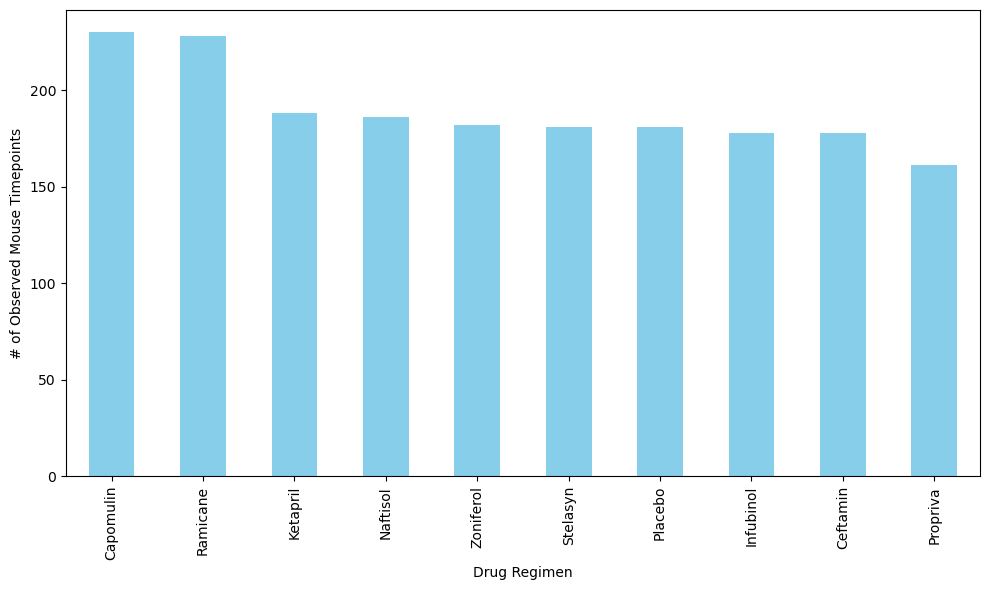

In [41]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group the data by Drug Regimen and count the number of rows in each group
regimen_counts = combined_data["Drug Regimen"].value_counts().reset_index()
regimen_counts.columns = ["Drug Regimen", "Count"]

# Sort the DataFrame by the count in descending order
regimen_counts = regimen_counts.sort_values(by="Count", ascending=False)

# Set the Drug Regimen column as the index for plotting
regimen_counts.set_index("Drug Regimen", inplace=True)

# Create a bar plot using the DataFrame.plot() method
#I am aware this part is not Pandas, but how else would one show a graph without matplotlib??
regimen_counts.plot(kind="bar", figsize=(10, 6), color='skyblue', legend=False)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.tight_layout()

# Display the bar plot
#I am aware this part is not Pandas, but how else would one show a graph without matplotlib??
plt.show()

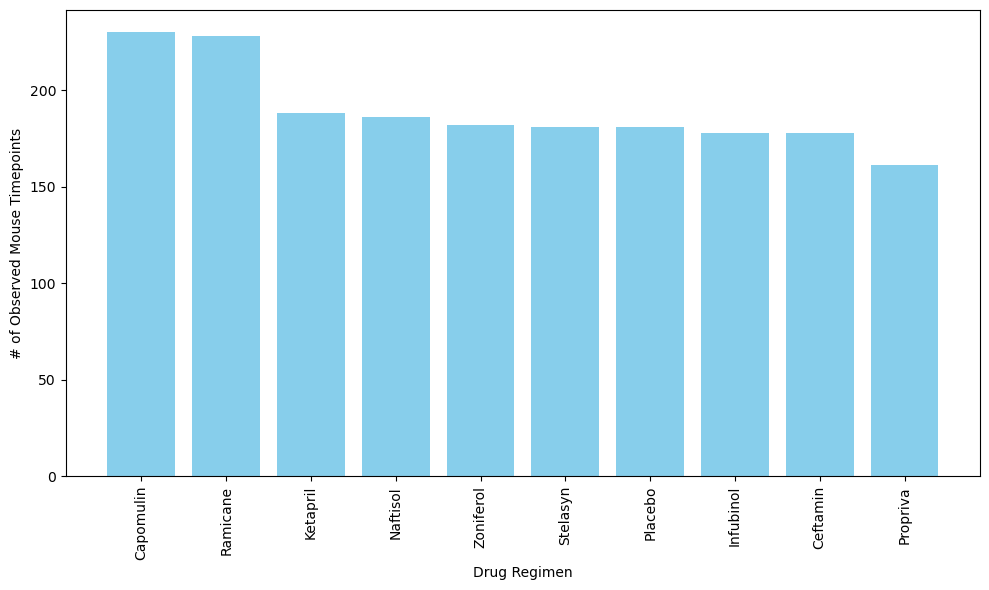

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Group the data by Drug Regimen and count the number of rows in each group
regimen_counts = combined_data["Drug Regimen"].value_counts().reset_index()
regimen_counts.columns = ["Drug Regimen", "Count"]

# Sort the DataFrame by the count in descending order
regimen_counts = regimen_counts.sort_values(by="Count", ascending=False)

# Set the Drug Regimen column as the index for plotting
regimen_counts.set_index("Drug Regimen", inplace=True)

# Create a bar plot using matplotlib.pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts["Count"], color='skyblue')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.tight_layout()

# Display the bar plot
plt.show()

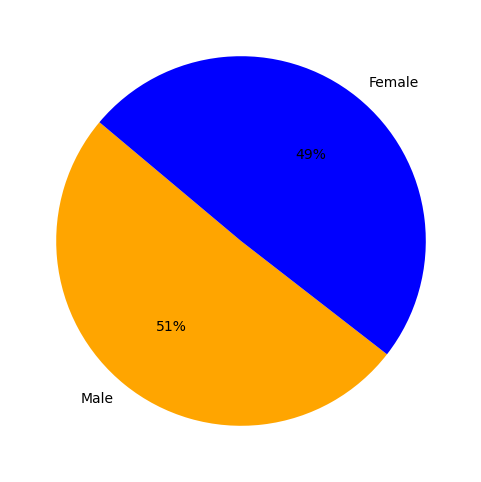

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Calculate the counts of female and male mice
gender_counts = combined_data["Sex"].value_counts()

# Create a pie plot using Pandas plotting functionality
ax = gender_counts.plot(kind="pie", autopct=lambda p: f'{p:.0f}%', colors=['orange', 'blue'], startangle=140, figsize=(6, 6))
ax.set_ylabel("")  # Remove the y-axis label

# Show the pie plot
#I am aware this part is not Pandas, but how else would one show a graph without matplotlib??
plt.show()

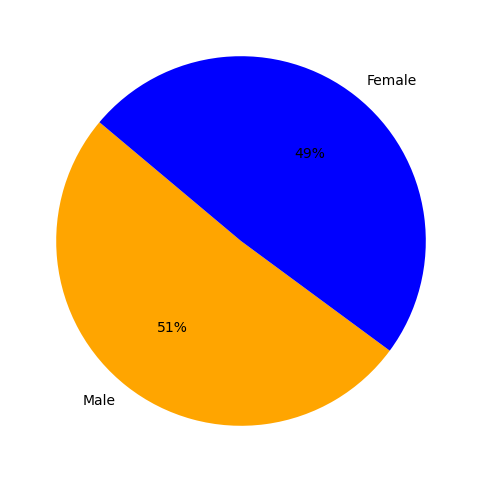

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Calculate the counts of female and male mice
gender_counts = combined_data["Sex"].value_counts()

# Calculate the percentages and round them to whole numbers
rounded_percentages = (gender_counts / gender_counts.sum() * 100).round()

# Create a pie plot
plt.figure(figsize=(6, 6))
plt.pie(rounded_percentages, labels=gender_counts.index, autopct='%1.0f%%', colors=['orange', 'blue'], startangle=140)

# Show the pie plot
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, combined_data, on=["Mouse ID", "Timepoint"], how="left")

# Filter for the specified treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin)
specified_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(specified_regimens)]

# Display the DataFrame 
final_tumor_volume.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [16]:
# List of treatment regimens for the for loop and plot labels
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to store tumor volume data for plotting
tumor_vol_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Get the tumor volumes for mice on the current treatment regimen
    tumor_volumes = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # Append the tumor volumes to the list for plotting
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate the quartiles and IQR
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Calculate the lower and upper bounds for potential outliers
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Determine potential outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Display information about potential outliers for the current treatment
    print(f"Potential outliers for {treatment}:", end=" ")  # Print without a newline
    if len(outliers) == 0:
        print("None found.")
    else:
        # Include the "Name: Tumor Volume (mm3)" as part of the data
        print(outliers.to_string(index=False) + "\n\tName: Tumor Volume (mm3)")

Potential outliers for Capomulin: None found.
Potential outliers for Ramicane: None found.
Potential outliers for Infubinol: 36.321346
	Name: Tumor Volume (mm3)
Potential outliers for Ceftamin: None found.


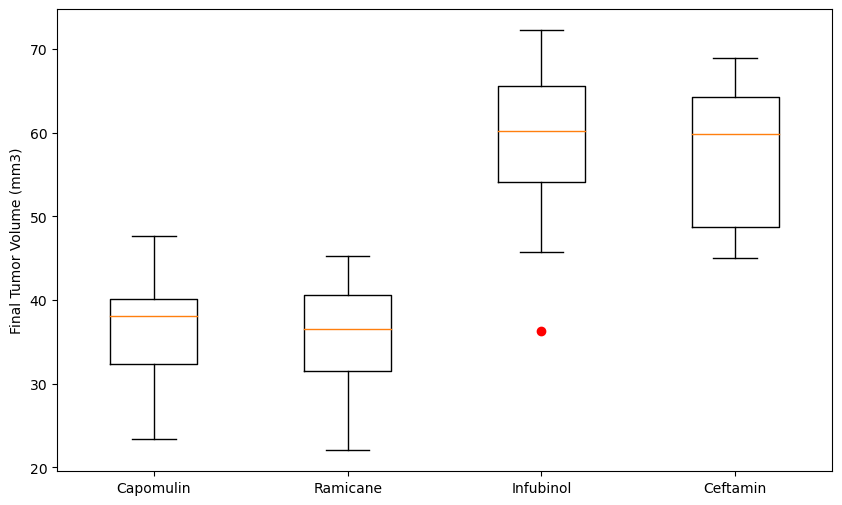

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a box plot for the tumor volume data for each treatment group
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments, sym='ro')
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks
plt.show()


## Line and Scatter Plots

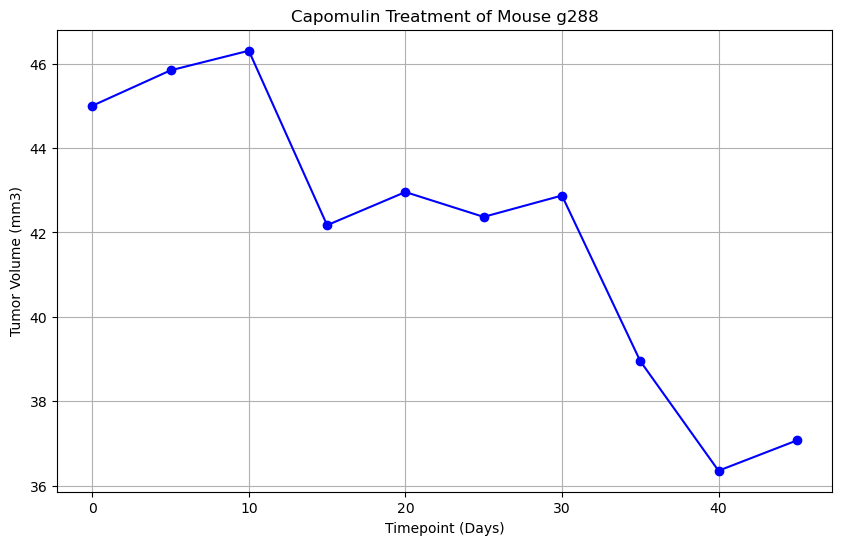

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Choose a specific mouse treated with Capomulin
target_mouse_id = "g288"  # Replace with the Mouse ID you want to plot

# Filter the data for the selected mouse and Capomulin treatment
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
selected_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == target_mouse_id]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(selected_mouse_data["Timepoint"], selected_mouse_data["Tumor Volume (mm3)"], marker='o', linestyle='-', color='b')
plt.title(f"Capomulin Treatment of Mouse {target_mouse_id}")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()

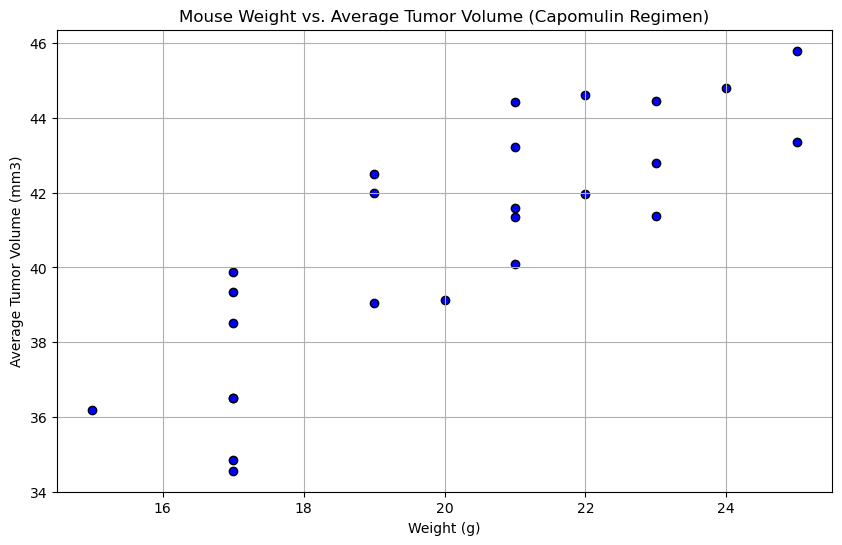

In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Group the data by Mouse ID and calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Retrieve the weight of each mouse
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, avg_tumor_volume, marker='o', facecolors='blue', edgecolors='black')
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid()

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


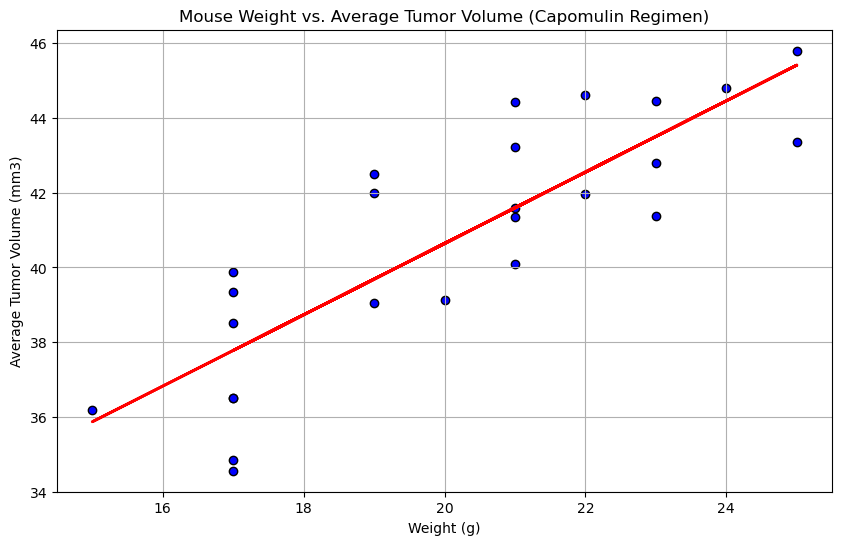

In [39]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Group the data by Mouse ID and calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Retrieve the weight of each mouse
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()

# Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(mouse_weights, avg_tumor_volume)

# Print the correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, avg_tumor_volume, marker='o', facecolors='blue', edgecolors='black')
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid()

# Create a linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weights, avg_tumor_volume)
predicted_tumor_volume = slope * mouse_weights + intercept

# Plot the regression line
plt.plot(mouse_weights, predicted_tumor_volume, color='red', linewidth=2)

plt.show()